# Linear Regression

Linear regression model with multiple variables looks like this: 
\begin{align}
{a(x)} = {\left\langle w, x\right\rangle}.
  \end{align}

Linear regression model with one variable looks like this: 
\begin{align}
{a(x)} = {w_1x + w_0}.
  \end{align}

In order to find the optimal parameteres $w_i$ the gradient descent method will be used:
\begin{align}
w^t=w^{t-1} - \eta_t \nabla Q(w^{t-1}, X)
  \end{align}

The end of the iterations happens when:
\begin{align}
||w^t - w^{t-1} || < \varepsilon
  \end{align}
or a particular number of iterations is reached.

As for the cost function I will use the MSE:
\begin{align} 
Q(w, X)=\frac{1}{l}\sum_{i=1}^l (\left\langle w, x_i\right\rangle - y_i)^2 \rightarrow \mathop{min}_{w}
  \end{align}
\begin{align}
Q(w_0,w_1,X)=\frac{1}{l}\sum_{i=1}^l (w_1x_i + w_0 -y_i)^2
  \end{align}

Partial derivatives for one variable case to perform gradient descent:
\begin{align} 
\frac{\partial Q}{\partial w_0} = \frac{2}{l} \sum_{i=1}^l (w_1x_i + w_0 -y_i) ,\ \frac{\partial Q}{\partial w_1} = \frac{2}{l} \sum_{i=1}^l (w_1x_i + w_0 -y_i)x_i
  \end{align}

Matrix form of the cost function (multivariable case):
\begin{align}
Q(w, X)=\frac{1}{l} || Xw - y ||^2 \rightarrow \mathop{min}_{w}
  \end{align}

Matrix form of the gradient:
\begin{align}
\nabla_wQ(w, X)=\frac{2}{l} X^T(Xw - y)
  \end{align}

### Linear regression (one variable)

In [550]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from numpy.random import choice

In [551]:
data = pd.read_csv('ex1data1.csv', names=['X', 'y'], header=None)

In [552]:
X = data.copy()
X.insert(0, '1', 1)
y = X.pop('y')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


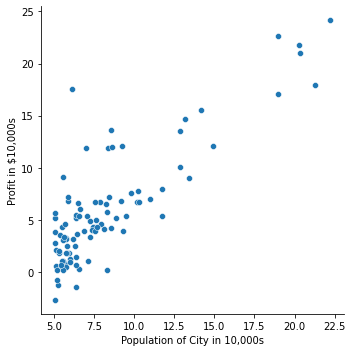

In [553]:
fig1 = sns.relplot(X['X'], y)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');
plt.show(fig1)

In [554]:
def cost_function(X, y, w):
  return (1/X.shape[0]) * np.linalg.norm(X.dot(w) - y) ** 2

Gradient descent function:

In [555]:
def gradient_descent(X, y, w, lr=1e-5, num_iter = 500):
  L = X.shape[0]
  grad_over_iter = []
  learning_rate = lr
  for _ in range(num_iter):
    w = w - learning_rate*2/L*np.transpose(X).dot(X.dot(w) - y)
    grad_over_iter.append(cost_function(X, y, w))
  return grad_over_iter, w

Stochastic gradient descent.

Instead of updating weights to improve the quality of the linear model on each training example, we need to choose only one:
\begin{align}
w^t=w^{t-1} - \eta_t \nabla Q(w^{t-1}, \{x_i\})
  \end{align}

Stochastic gradient descent function:

In [556]:
def stochastic_gd(X, y, w, lr=1e-5, num_iter = 500):
  L = X.shape[0]
  grad_over_iter = []
  learning_rate = lr
  for _ in range(num_iter):
    idx = np.random.randint(L, size=1)
    w = w - learning_rate*2/L*np.transpose(X[idx, :]).dot(X[idx, :].dot(w) - y[idx])
    grad_over_iter.append(cost_function(X, y, w))
  return grad_over_iter, w

In [557]:
w = np.zeros((X.shape[1]))
X_np = X.copy()
y_np = y.copy()
X_np = X_np.to_numpy()
y_np = y_np.to_numpy()

In [558]:
plot_grad, w_grad = gradient_descent(X_np, y_np, w, lr=1e-2, num_iter = 500)
plot_stochastic, w_stochastic = stochastic_gd(X_np, y_np, w, lr=1e-2, num_iter = 5000)

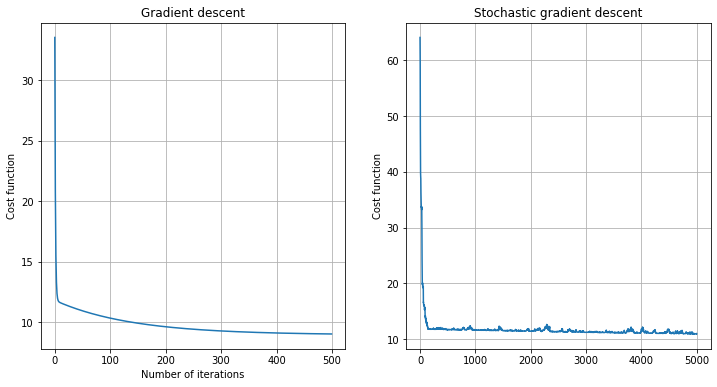

In [559]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(plot_grad)
ax1.grid()
ax1.set_xlabel('Number of iterations')
ax1.set_ylabel('Cost function')
ax1.set_title('Gradient descent')
ax2.plot(plot_stochastic)
ax2.grid()
ax2.set_ylabel('Number of iterations')
ax2.set_ylabel('Cost function')
ax2.set_title('Stochastic gradient descent')
fig.set_size_inches(12, 6)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


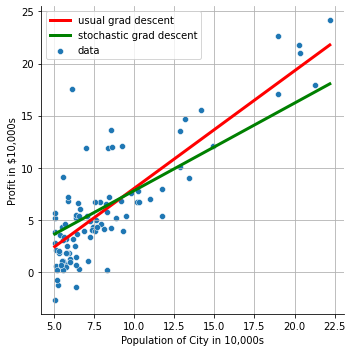

In [560]:
sns.relplot(X['X'], y, label='data')
sns.lineplot(X['X'], X.dot(w_grad), color='red', linewidth=3, label='usual grad descent')
sns.lineplot(X['X'], X.dot(w_stochastic), color='green', linewidth=3, label='stochastic grad descent')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.grid()

### Linear Regression (multivariable case)

In [561]:
data_mult = pd.read_csv('ex1data2.csv', names=['X1', 'X2', 'y'], header=None)

In [562]:
data_mult.head()

,X1,X2,y
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [563]:
X = data_mult.copy()
X.insert(0, '1', 1)
y = X.pop('y')

In [564]:
X['X1'] = X['X1'].apply(lambda x: (x - X['X1'].mean())/X['X1'].std())
X['X2'] = X['X2'].apply(lambda x: (x - X['X2'].mean())/X['X2'].std())
# y = y.apply(lambda x: (x - y.mean())/y.std())

In [565]:
w = np.zeros((X.shape[1]))
X_np = X.copy().to_numpy()
y_np = y.copy().to_numpy()

In [566]:
plot_grad, w_grad = gradient_descent(X_np, y_np, w, lr=1e-2, num_iter = 500)
plot_stochastic, w_stochastic = stochastic_gd(X_np, y_np, w, lr=1e-2, num_iter = 15000)

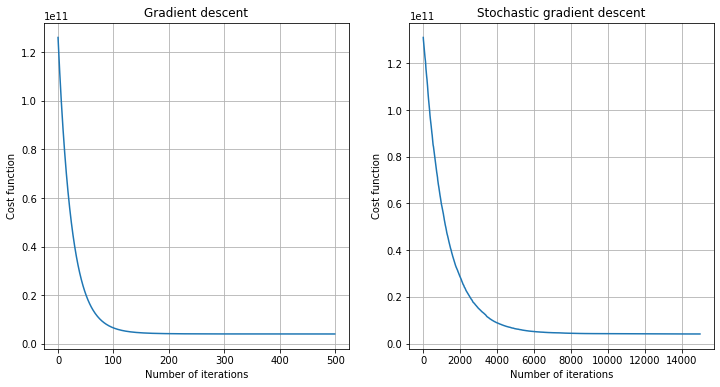

In [567]:
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.plot(plot_grad)
ax1.grid()
ax1.set_title('Gradient descent')
ax1.set_xlabel('Number of iterations')
ax1.set_ylabel('Cost function')
ax2.plot(plot_stochastic)
ax2.set_title('Stochastic gradient descent')
ax2.grid()
ax2.set_ylabel('Cost function')
ax2.set_xlabel('Number of iterations')
fig.set_size_inches(12, 6)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


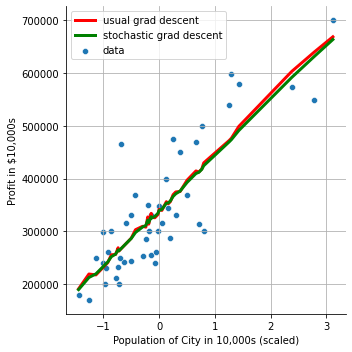

In [568]:
sns.relplot(X['X1'], y, label='data')
sns.lineplot(X['X1'], X.dot(w_grad), color='red', linewidth=3, label='usual grad descent')
sns.lineplot(X['X1'], X.dot(w_stochastic), color='green', linewidth=3, label='stochastic grad descent')
plt.xlabel('Population of City in 10,000s (scaled)')
plt.ylabel('Profit in $10,000s')
plt.grid()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


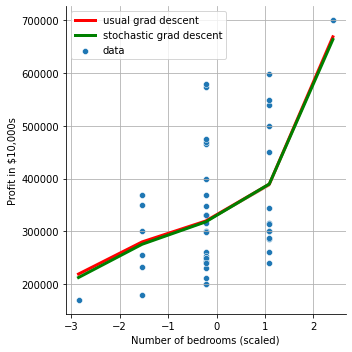

In [569]:
sns.relplot(X['X2'], y, label='data')
sns.lineplot(X['X2'], X.dot(w_grad), color='red', ci=0, linewidth=3, label='usual grad descent')
sns.lineplot(X['X2'], X.dot(w_stochastic), color='green', ci=0, linewidth=3, label='stochastic grad descent')
plt.xlabel('Number of bedrooms (scaled)')
plt.ylabel('Profit in $10,000s')
plt.grid()